![paleoCAMP logo](./images/paleoCAMPLogo.png)

# 4b. Option 2: Analyze Long MidHolocene simulations

**Tutorials at [the 2025 paleoCAMP](https://paleoclimate.camp/) | June 16–June 30, 2025**
       
[Jiang Zhu](https://staff.cgd.ucar.edu/jiangzhu/)  
[jiangzhu@ucar.edu](mailto:jiangzhu@ucar.edu)  
Climate & Global Dynamics Laboratory  
NSF National Center for Atmospheric Research   

------

**Learning Objectives:**

- Use JupyterHub to access and explore available simulation datasets
- Evaluate the role of internal climate variability by comparing plots with the one-year simulation in Section `3. Analyze CESM Output`
- Understand how orbital forcing _could_ influence the ITCZ and monsoon precipitation
- Understand how green Sahara (vegetation forcing) _could_ influence the ITCZ and precipitation

**Time to learn**: 60 minutes

---
**How to get started?**  
- Make sure you have an active JupyterHub server
- Find and open the notebook `4b_opt2_analyze_long_midHolocene` in the left sidebar
- Make sure to use `NPL 2025a` as your Kernel (select from top right corner)
![Launch Terminal](./images/select_npl2025a.png)
<p style="text-align: center;">Figure: Launch a Terminal</p>

---
Load Python packages

In [1]:
import os
from datetime import timedelta

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

---
## Analysis 1: How does orbital forcing impact the ITCZ and monsoon precipitation during the midHolocene?
- We revisit this problem using longer and better equilibrated midHolocene simulation with iCESM1.2
- Averaging over longer time (100 years here) helps to remove internal variability

### The first step is to figure out the directory structure of the data
- `b.e12.B1850C5.f19_g16.iPI.01` is a preindustrial control simulation of 900 model years
- `b.e12.B1850C5.f19_g16.i06ka.03` is a mid-Holocene simulation of 900 years with only the orbital forcing
- Reference for the simulations: [Osman et al. 2021](https://www.nature.com/articles/s41586-021-03984-4)

In [2]:
campaign_dir = '/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2'

!ls /glade/campaign/cgd/ppc/jiangzhu/iCESM1.2

b.e12.B1850C5.f19_g16.i03ka.01
b.e12.B1850C5.f19_g16.i06ka.03
b.e12.B1850C5.f19_g16.i06ka.04
b.e12.B1850C5.f19_g16.i09ka.01
b.e12.B1850C5.f19_g16.i12ka.01
b.e12.B1850C5.f19_g16.i12ka.02
b.e12.B1850C5.f19_g16.i12ka_WH025a.01
b.e12.B1850C5.f19_g16.i14ka.01
b.e12.B1850C5.f19_g16.i16ka.01
b.e12.B1850C5.f19_g16.i16ka_WH025a.01
b.e12.B1850C5.f19_g16.i18ka.01
b.e12.B1850C5.f19_g16.i21ka.03
b.e12.B1850C5.f19_g16.i21ka.03.0kaGaI
b.e12.B1850C5.f19_g16.i21ka.03.0kaGHG
b.e12.B1850C5.f19_g16.i21ka.03.0kaICE
b.e12.B1850C5.f19_g16.iPI.01
b.e12.B1850C5.f19_g16.iPI.01.21kaGaI
b.e12.B1850C5.f19_g16.iPI.01.21kaGHG
b.e12.B1850C5.f19_g16.iPI.01.21kaICE
b.e12.B1850C5.f19_g16.iPIx2.01
extra
please_cite_tierney2020_zhu2021_osman2021


In [3]:
case_PI = 'b.e12.B1850C5.f19_g16.iPI.01'
case_MH = 'b.e12.B1850C5.f19_g16.i06ka.03'

# This is the folder structure under each simulation (case)
# This means atmosphere, postprocessed timeseries at monthly frequency
comp = 'atm/proc/tseries/month_1'

print('list piControl precip. files')
!ls /glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.iPI.01/atm/proc/tseries/month_1/*PRECC.*
!ls /glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.iPI.01/atm/proc/tseries/month_1/*PRECL.*

print('list midHolocene precip. files')
!ls /glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.03/atm/proc/tseries/month_1/*PRECC.*
!ls /glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.03/atm/proc/tseries/month_1/*PRECL.*

list piControl precip. files
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.iPI.01/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECC.0001-0900.cal_adj.nc
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.iPI.01/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECC.0001-0900.nc
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.iPI.01/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECL.0001-0900.cal_adj.nc
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.iPI.01/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECL.0001-0900.nc
list midHolocene precip. files
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.03/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.03.cam.h0.PRECC.0001-0900.cal_adj.nc
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.03/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.03.cam.h0.PRECC.0001-0900.nc
/g

***NOTE: files with `cal_adj` mean they have been corrected for the calendar effect (recall Jess's lecture on orbital forcing)***

- Create a list of files we need for piControl

In [4]:
# fname_precc = 'b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECC.0001-0900.nc'
# fname_precl = 'b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECL.0001-0900.nc'

# We use the files with calendar effect adjustments
fname_precc = 'b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECC.0001-0900.cal_adj.nc'
fname_precl = 'b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECL.0001-0900.cal_adj.nc'

flist_PI = [os.path.join(campaign_dir, case_PI, comp, fname_precc),
            os.path.join(campaign_dir, case_PI, comp, fname_precl)]
flist_PI

['/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.iPI.01/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECC.0001-0900.cal_adj.nc',
 '/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.iPI.01/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.iPI.01.cam.h0.PRECL.0001-0900.cal_adj.nc']

- Create a list of files we need for midHolocene

In [5]:
# fname_precc = 'b.e12.B1850C5.f19_g16.i06ka.03.cam.h0.PRECC.0001-0900.nc'
# fname_precl = 'b.e12.B1850C5.f19_g16.i06ka.03.cam.h0.PRECL.0001-0900.nc'

# We use the files with calendar effect adjustments
fname_precc = 'b.e12.B1850C5.f19_g16.i06ka.03.cam.h0.PRECC.0001-0900.cal_adj.nc'
fname_precl = 'b.e12.B1850C5.f19_g16.i06ka.03.cam.h0.PRECL.0001-0900.cal_adj.nc'

flist_MH = [os.path.join(campaign_dir, case_MH, comp, fname_precc),
            os.path.join(campaign_dir, case_MH, comp, fname_precl)]
flist_MH

['/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.03/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.03.cam.h0.PRECC.0001-0900.cal_adj.nc',
 '/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.03/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.03.cam.h0.PRECL.0001-0900.cal_adj.nc']

### Read in piControl and midHolocene data

In [6]:
ds_PI = xr.open_mfdataset(
    flist_PI, data_vars='minimal', coords='minimal', compat='override')

# We need this fix to get the correct time, i.e., January to December
ds_PI['time'] = ds_PI.time.get_index('time') - timedelta(days=15)

ds_PI

<xarray.Dataset> Size: 1GB
Dimensions:    (lev: 30, ilev: 31, lat: 96, lon: 144, time: 10800, nbnd: 2)
Coordinates:
  * lev        (lev) float64 240B 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev       (ilev) float64 248B 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * time       (time) object 86kB 0001-01-16 23:08:30.912478 ... 0900-12-16 2...
Dimensions without coordinates: nbnd
Data variables: (12/25)
    hyam       (lev) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    hybm       (lev) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    hyai       (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    hybi       (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    P0         float64 8B ...
    ndbase     int32 4B ...
    ...         ...
    f11vmr     (time) float64 86kB dask.array<chunksize=(10800,), meta=np.ndarray>
    f12vmr     (time) float64 86kB dask.array<chunksize=(10800,), meta=np.ndarray>
    sol_tsi    (time) float64 86kB dask.array<chunksize=(10800,), meta=np.ndarray>
    nsteph     (time) int32 43kB dask.array<chunksize=(10800,), meta=np.ndarray>
    PRECC      (time, lat, lon) float32 597MB dask.array<chunksize=(10800, 96, 144), meta=np.ndarray>
    PRECL      (time, lat, lon) float32 597MB dask.array<chunksize=(10800, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.0
    source:                     CAM
    case:                       b.e12.B1850C5.f19_g16.iPI.01
    title:                      UNSET
    logname:                    jiangzhu
    host:                       r5i1n15
    Version:                    $Name$
    revision_Id:                $Id$
    initial_file:               b.ie12.B1850C5CN.f19_g16.09.cam.i.0401-01-01-...
    topography_file:            /glade/p/cesmdata/cseg/inputdata/atm/cam/topo...
    paleo_calendar_adjustment:  2020-07-07 22:40:03 paleo calendar adjustment...

- Select the last 100 years using `.sel`

In [7]:
ds_PI = ds_PI.sel(time=slice('0801', '0900'))
ds_PI

<xarray.Dataset> Size: 133MB
Dimensions:    (lev: 30, ilev: 31, lat: 96, lon: 144, time: 1200, nbnd: 2)
Coordinates:
  * lev        (lev) float64 240B 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev       (ilev) float64 248B 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * time       (time) object 10kB 0801-01-16 23:08:30.912476 ... 0900-12-16 2...
Dimensions without coordinates: nbnd
Data variables: (12/25)
    hyam       (lev) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    hybm       (lev) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    hyai       (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    hybi       (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    P0         float64 8B ...
    ndbase     int32 4B ...
    ...         ...
    f11vmr     (time) float64 10kB dask.array<chunksize=(1200,), meta=np.ndarray>
    f12vmr     (time) float64 10kB dask.array<chunksize=(1200,), meta=np.ndarray>
    sol_tsi    (time) float64 10kB dask.array<chunksize=(1200,), meta=np.ndarray>
    nsteph     (time) int32 5kB dask.array<chunksize=(1200,), meta=np.ndarray>
    PRECC      (time, lat, lon) float32 66MB dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
    PRECL      (time, lat, lon) float32 66MB dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.0
    source:                     CAM
    case:                       b.e12.B1850C5.f19_g16.iPI.01
    title:                      UNSET
    logname:                    jiangzhu
    host:                       r5i1n15
    Version:                    $Name$
    revision_Id:                $Id$
    initial_file:               b.ie12.B1850C5CN.f19_g16.09.cam.i.0401-01-01-...
    topography_file:            /glade/p/cesmdata/cseg/inputdata/atm/cam/topo...
    paleo_calendar_adjustment:  2020-07-07 22:40:03 paleo calendar adjustment...

- Repeat for midHolocene

In [8]:
ds_MH = xr.open_mfdataset(
    flist_MH, data_vars='minimal', coords='minimal', compat='override')

# We need this fix to get the correct time, i.e., January to December
ds_MH['time'] = ds_MH.time.get_index('time') - timedelta(days=15)
ds_MH = ds_MH.sel(time=slice('0801', '0900'))

ds_MH

<xarray.Dataset> Size: 133MB
Dimensions:    (lev: 30, ilev: 31, lat: 96, lon: 144, time: 1200, nbnd: 2)
Coordinates:
  * lev        (lev) float64 240B 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev       (ilev) float64 248B 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * time       (time) object 10kB 0801-01-14 09:41:24.727500 ... 0900-12-12 2...
Dimensions without coordinates: nbnd
Data variables: (12/25)
    hyam       (lev) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    hybm       (lev) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    hyai       (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    hybi       (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    P0         float64 8B ...
    ndbase     int32 4B ...
    ...         ...
    f11vmr     (time) float64 10kB dask.array<chunksize=(1200,), meta=np.ndarray>
    f12vmr     (time) float64 10kB dask.array<chunksize=(1200,), meta=np.ndarray>
    sol_tsi    (time) float64 10kB dask.array<chunksize=(1200,), meta=np.ndarray>
    nsteph     (time) int32 5kB dask.array<chunksize=(1200,), meta=np.ndarray>
    PRECC      (time, lat, lon) float32 66MB dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
    PRECL      (time, lat, lon) float32 66MB dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.0
    source:                     CAM
    case:                       b.e12.B1850C5.f19_g16.i06ka.03
    title:                      UNSET
    logname:                    jiangzhu
    host:                       r3i7n29
    Version:                    $Name$
    revision_Id:                $Id$
    initial_file:               /glade/p/cesmdata/cseg/inputdata/atm/cam/inic...
    topography_file:            /glade/work/jiangzhu/data/inputdata/cesm120ka...
    paleo_calendar_adjustment:  2020-07-08 00:15:03 paleo calendar adjustment...

### Compute the NH summer mean (JJA)

In [9]:
m_p_s_to_mm_p_day = 86400000

- piControl

In [10]:
# Recall Kevin's method to compute JJA mean
ds_PI_JJA = ds_PI.groupby('time.season').mean(dim='time').sel(season='JJA')

prec_PI = (ds_PI_JJA.PRECC + ds_PI_JJA.PRECL) * m_p_s_to_mm_p_day

prec_PI

<xarray.DataArray (lat: 96, lon: 144)> Size: 111kB
dask.array<mul, shape=(96, 144), dtype=float64, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    season   <U3 12B 'JJA'

- ***Task 1: Add your code for midHolocene using `ds_MH`***

<div class="alert alert-success">   
<details>
 
<summary><font face="Times New Roman" color='blue'>Click here for the solution</font></summary><br>
Copy and paste the code into the above cell

```python

ds_MH_JJA = ds_MH.groupby('time.season').mean(dim='time').sel(season='JJA')

prec_MH = (ds_MH_JJA.PRECC + ds_MH_JJA.PRECL) * m_p_s_to_mm_p_day

prec_MH

```

</details>
</div>

### Plot JJA precipitation for piControl, midHolocene, and the difference between them
- I have an example on how to plot the JJA mean precipitation from piControl
- ***Task 2: Add your own code below to plot that for midHolocene***
- ***Task 3: Add your own code below to plot the anomaly (midHolocene - piControl)***

/glade/u/apps/opt/conda/envs/npl-2025a/lib/python3.12/site-packages/dask/config.py:787: FutureWarning: Dask configuration key 'allowed-failures' has been deprecated; please use 'distributed.scheduler.allowed-failures' instead
  warnings.warn(


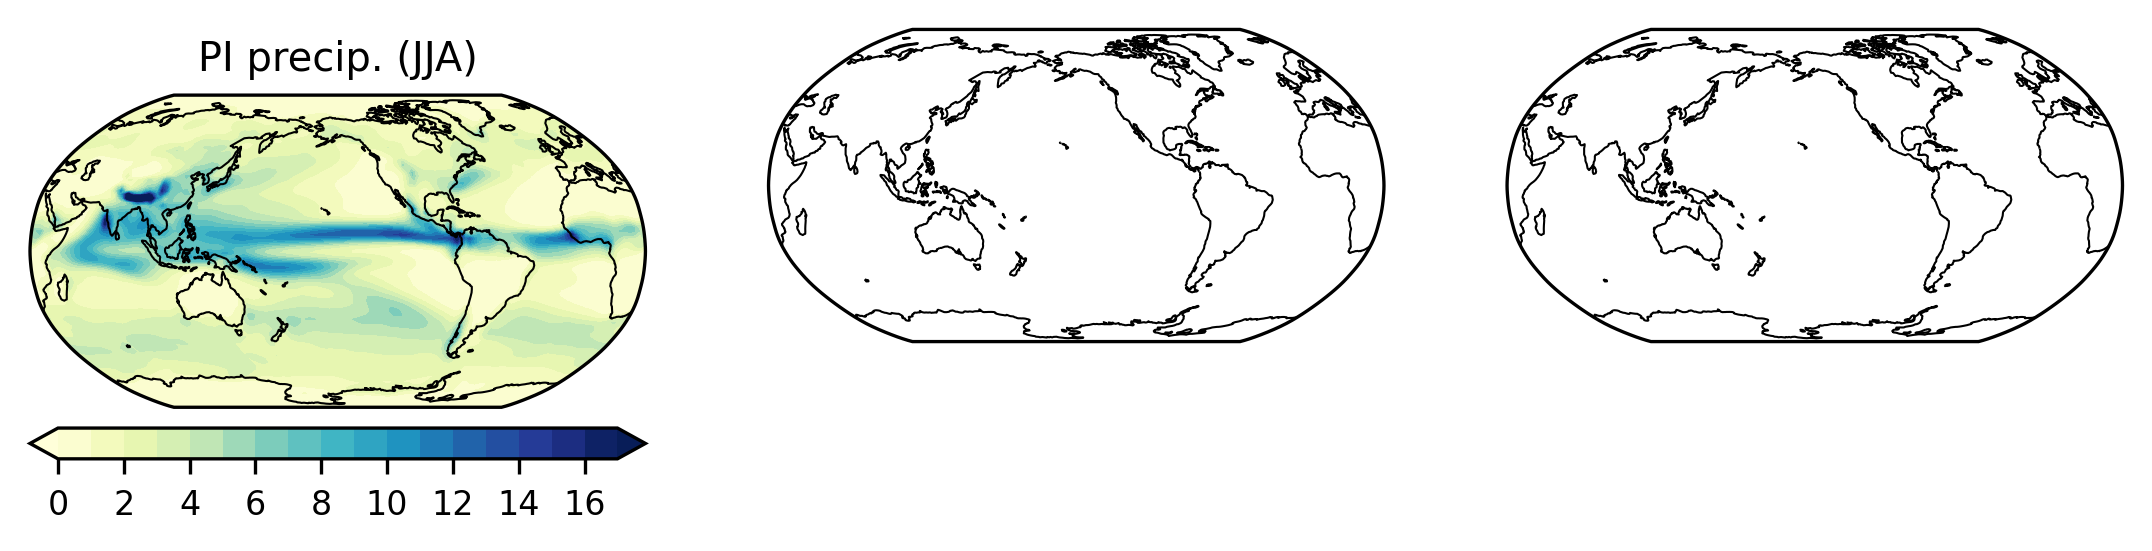

In [11]:
# One big figure with three horizontal panels
fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={
    'projection': ccrs.Robinson(central_longitude=210)})

# Use the first subplot for piControl
ax0 = axes[0]

# Add cyclic point first
prec_PI_new, lon_new = add_cyclic_point(prec_PI, prec_PI.lon)

p0 = ax0.contourf(lon_new, prec_PI.lat, prec_PI_new,
                 cmap='YlGnBu',
                 levels=np.linspace(0, 17, 18),
                 extend='both',
                 transform=ccrs.PlateCarree())
plt.colorbar(p0, orientation='horizontal', pad=0.03)
ax0.set_title("PI precip. (JJA)")


# Use the second subplot for midHolocene
ax1 = axes[1]


# Use the third subplot for midHolocene - piControl
ax2 = axes[2]


# Loop over subplots to add coastlines
for ax in axes:
    ax.coastlines(linewidth=0.5)


<div class="alert alert-success">   
<details>
 
<summary><font face="Times New Roman" color='blue'>Click here for the solution</font></summary><br>
Copy and paste the code into the above cell

```python

prec_MH_new, lon_new = add_cyclic_point(prec_MH, prec_MH.lon)

p1 = ax1.contourf(lon_new, prec_MH.lat, prec_MH_new,
                 cmap='YlGnBu',
                 levels=np.linspace(0, 17, 18),
                 extend='both',
                 transform=ccrs.PlateCarree())
plt.colorbar(p1, orientation='horizontal', pad=0.03)
ax1.set_title("MH precip. (JJA)")


```


<br>

```python

prec_ano_new = prec_MH_new - prec_PI_new

p2 = ax2.contourf(lon_new, prec_MH.lat, prec_ano_new,
                 cmap='BrBG',
                 levels=np.linspace(-5, 5, 21),
                 extend='both',
                 transform=ccrs.PlateCarree())
plt.colorbar(p2, orientation='horizontal', pad=0.03)
ax2.set_title("MH - PI precip. (JJA)")


```

</details>
</div>

### Discussion
- How does the ITCZ change in iCESM1.2 in response to the mid-Holocene orbital forcing?
- How does this new results compare with our previous one-year simulation?
- How does this results compare with findings from Kutzbach and Otto-Bliesner (1981, 1982)?
- Ask Kathleen, Jane, Daniel, and Kevin about ITCZ and monsoon!

---
## Analysis 2: What if we have a green Sahara?
- Paleoclimate evidence suggests a much greener Sahara during the midHolocene than the present. Read Jess's introduction to the [African Humid Periods](https://www.nature.com/scitable/knowledge/library/green-sahara-african-humid-periods-paced-by-82884405/).
- iCESM1.2 cannot predict vegetation change, i.e., not a complete "Earth System Model".
- Jiang performed an additional midHolocene simulation of 400 years with a prescribed green Sahara with much more vegetation (`b.e12.B1850C5.f19_g16.i06ka.04`, in contrast to `i06ka.03` that has a preindustrial "desert" Sahara).
- Remeber that prescribing more vegetation is just a simple way to explore the potential effects of a green Sahara.

### Figure out the file directory and create list of files

In [12]:
case_MHGS = 'b.e12.B1850C5.f19_g16.i06ka.04'

print('list midHoloceneGreenSahara files')
!ls /glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.04/atm/proc/tseries/month_1/*PRECC.*
!ls /glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.04/atm/proc/tseries/month_1/*PRECL.*

list midHoloceneGreenSahara files
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.04/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECC.0001-0400.cal_adj.nc
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.04/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECC.0001-0400.nc
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.04/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECL.0001-0400.cal_adj.nc
/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.04/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECL.0001-0400.nc


In [13]:
# fname_precc = 'b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECC.0001-0400.nc'
# fname_precl = 'b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECL.0001-0400.nc'

# We use the files with calendar effect adjustments
fname_precc = 'b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECC.0001-0400.cal_adj.nc'
fname_precl = 'b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECL.0001-0400.cal_adj.nc'


flist_MHGS = [os.path.join(campaign_dir, case_MHGS, comp, fname_precc),
              os.path.join(campaign_dir, case_MHGS, comp, fname_precl)]

flist_MHGS

['/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.04/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECC.0001-0400.cal_adj.nc',
 '/glade/campaign/cgd/ppc/jiangzhu/iCESM1.2/b.e12.B1850C5.f19_g16.i06ka.04/atm/proc/tseries/month_1/b.e12.B1850C5.f19_g16.i06ka.04.cam.h0.PRECL.0001-0400.cal_adj.nc']

### Read in new midHolocene simulaiton with a green Sahara

In [14]:
ds_MHGS = xr.open_mfdataset(
    flist_MHGS, data_vars='minimal', coords='minimal', compat='override')

# We need this fix to get the correct time, i.e., January to December of year 1
ds_MHGS['time'] = ds_MHGS.time.get_index('time') - timedelta(days=15)

# Select the last 100 years
ds_MHGS = ds_MHGS.sel(time=slice('0301', '0400'))

ds_MHGS

<xarray.Dataset> Size: 133MB
Dimensions:    (lev: 30, ilev: 31, lat: 96, lon: 144, time: 1200, nbnd: 2)
Coordinates:
  * lev        (lev) float64 240B 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev       (ilev) float64 248B 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * time       (time) object 10kB 0301-01-14 09:41:24.727502 ... 0400-12-12 2...
Dimensions without coordinates: nbnd
Data variables: (12/25)
    hyam       (lev) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    hybm       (lev) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    hyai       (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    hybi       (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    P0         float64 8B ...
    ndbase     int32 4B ...
    ...         ...
    f11vmr     (time) float64 10kB dask.array<chunksize=(1200,), meta=np.ndarray>
    f12vmr     (time) float64 10kB dask.array<chunksize=(1200,), meta=np.ndarray>
    sol_tsi    (time) float64 10kB dask.array<chunksize=(1200,), meta=np.ndarray>
    nsteph     (time) int32 5kB dask.array<chunksize=(1200,), meta=np.ndarray>
    PRECC      (time, lat, lon) float32 66MB dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
    PRECL      (time, lat, lon) float32 66MB dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.0
    source:                     CAM
    case:                       b.e12.B1850C5.f19_g16.i06ka.04
    title:                      UNSET
    logname:                    jiangzhu
    host:                       r2i0n29
    Version:                    $Name$
    revision_Id:                $Id$
    initial_file:               b.e12.B1850C5.f19_g16.i06ka.03.cam.i.0901-01-...
    topography_file:            /glade/work/jiangzhu/data/inputdata/cesm120ka...
    paleo_calendar_adjustment:  2020-09-29 01:04:27 paleo calendar adjustment...

### Compute the NH summer mean (JJA) of the last 100 years

In [15]:
ds_MHGS_JJA = ds_MHGS.groupby('time.season').mean(dim='time').sel(season='JJA')

prec_MHGS = (ds_MHGS_JJA.PRECC + ds_MHGS_JJA.PRECL) * m_p_s_to_mm_p_day

prec_MHGS

<xarray.DataArray (lat: 96, lon: 144)> Size: 111kB
dask.array<mul, shape=(96, 144), dtype=float64, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    season   <U3 12B 'JJA'

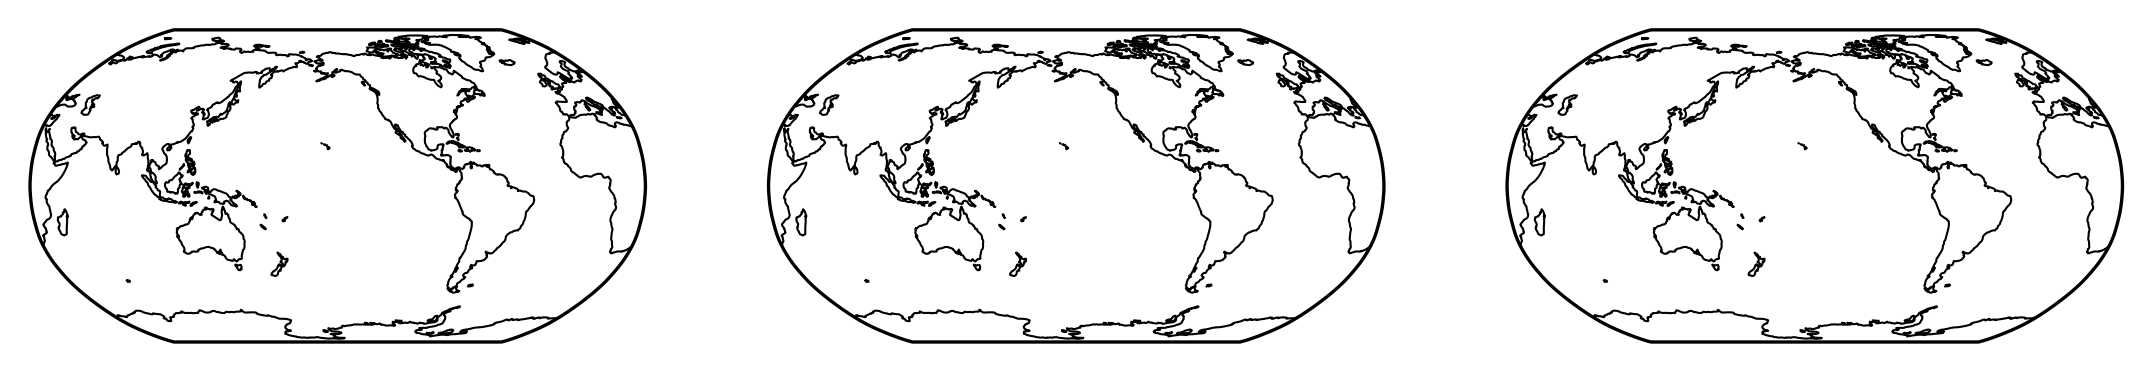

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={
    'projection': ccrs.Robinson(central_longitude=210)})

# Use the first subplot for response to orbital forcing (PREC_MH - PREC_PI)
ax0 = axes[0]


# Use the second subplot for response to vegetation forcing (PREC_MHGS - PREC_MH)
ax1 = axes[1]



# Use the third subplot for response to combined forcings (PREC_MHGS - PREC_PI)
ax2 = axes[2]



for ax in axes:
    ax.coastlines(linewidth=0.5)

<div class="alert alert-success">   
<details>
 
<summary><font face="Times New Roman" color='blue'>Click here for the solution</font></summary><br>
Copy and paste the code into the above cell

```python


# Use the first subplot for response to orbital forcing
ax0 = axes[0]

prec_MH_ano = prec_MH_new - prec_PI_new

p0 = ax0.contourf(lon_new, prec_MH.lat, prec_MH_ano,
                 cmap='BrBG',
                 levels=np.linspace(-5, 5, 21),
                 extend='both',
                 transform=ccrs.PlateCarree())
plt.colorbar(p0, orientation='horizontal', pad=0.03)
ax0.set_title("ORB forced: MH - PI")


# Use the second subplot for response to vegetation forcing
ax1 = axes[1]

prec_MHGS_new, lon_new = add_cyclic_point(prec_MHGS, prec_MHGS.lon)
prec_MHGS_ano = prec_MHGS_new - prec_MH_new

p1 = ax1.contourf(lon_new, prec_MH.lat, prec_MHGS_ano,
                 cmap='BrBG',
                 levels=np.linspace(-5, 5, 21),
                 extend='both',
                 transform=ccrs.PlateCarree())
plt.colorbar(p1, orientation='horizontal', pad=0.03)
ax1.set_title("VEG forced: MHGS - MH")



# Use the third subplot for response to combined forcings
ax2 = axes[2]

prec_MHGS_ano2 = prec_MHGS_new - prec_PI_new

p2 = ax2.contourf(lon_new, prec_MH.lat, prec_MHGS_ano2,
                 cmap='BrBG',
                 levels=np.linspace(-5, 5, 21),
                 extend='both',
                 transform=ccrs.PlateCarree())
plt.colorbar(p2, orientation='horizontal', pad=0.03)
ax2.set_title("ORB + VEG forced: MHGS - PI")


```

</details>
</div>

### Small group discussion
- How does the vegetation forcing over the Sahara impact the local precipitation?
- Does the vegetation forcing impact the ITCZ?
- Does the vegetation forcing impact the Walker Circulation?
- What do you see in the ORB-VEG combined response?

---
## Summary so far
- We need longer simulations to allow the modeled climate state to reach equilibrium.
- Longer simulations also allows robust signal by removing internal variability.
- Both orbital and vegetation forcings impact atmosphere circulation, precipitation, and other climate states.

---
## Optional
- Write your own code to explore the calendar effect by comparing files with and without `cal_adj`